# Classifier Evaluation




#### Notebook to play with the evaluation metrics used for classifiers

##### https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets can be used to create variety of toy datasets like swiss roll, moons, circles etc.

In [0]:
from sklearn.datasets.samples_generator import make_blobs 
from matplotlib import pyplot
from pandas import DataFrame
seed = 0 # to keep the same results 

##### Toy Data Generation

In [0]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=seed)

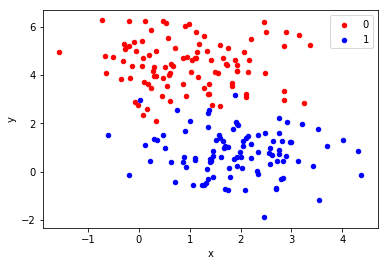

In [205]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

##### Split into Test and Train since this helps evaluate on unseen data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed) #randomly sampled
# print X_test.shape,X_train.shape

##### Naive Bayes Classifier

In [207]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

![](https://i.ibb.co/b1S1d2q/Screen-Shot-2019-05-24-at-11-40-41-PM.png)


##### Try writing a function to count them: 

In [0]:
def count_func(y_true, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
#     0 is neg class and 1 is positive for us
    for i in range(len(y_pred)): 
        if y_true[i] == 1 and y_pred[i] == 1:
           TP += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
           FN += 1
        elif y_true[i] == 0 and y_pred[i] == 0: 
           TN += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
           FP += 1
    return TP, TN, FP, FN

In [211]:
TP, TN, FP, FN = count_func(y_train, y_train_pred)
print TP, TN, FP, FN

81 15 63 1


#### 1. Accuracy

In [212]:
from sklearn.metrics import accuracy_score
# Format : accuracy_score(y_pred,y_true)
print("Accuracy: ")
print "Sk-learn implementation : ", accuracy_score(y_train_pred,y_train)

# Accuracy = (TP + TN) / (TP + TN + FP + FN)
print "Actual Formula: ",(TP+TN)/float(TP+TN+FP+FN)


Accuracy: 
Sk-learn implementation :  0.6
Actual Formula:  0.6


#### 2. Error Rate

In [0]:
# Error Rate = 1 – accuracy or (FP + FN) / (TP + TN + FP + FN)




### The Accuracy Paradox.
Accuracy ( and error rate) alone is never a good measure.  Even a dummy classifier manages to get near same accuracy as our trained models. Example :

---
![alt text](https://i.ibb.co/dGsc1CX/Screen-Shot-2019-05-28-at-11-18-03-AM.png)

Accuracy (from prev formula): (10+110)/150 = 73.3%

Just mark all points as negative class then : 

![alt text](https://i.ibb.co/ccVZ8R9/Screen-Shot-2019-05-28-at-11-18-09-AM.png)

**Accuracy (from prev formula): 125/150 = 83.3%**

This is simply due to the larger number of neg samples compared to positive.

 ##### Images source : https://urlzs.com/zcji1



---



#### 3. Precision :  

*  It is the number of positive predictions divided by the total number of positive class values predicted.
*  Precision expresses the proportion of the data points our model says was relevant actually were relevant.





In [0]:
# Precision = TP / (TP + FP)


from sklearn.metrics import precision_score
# precision_score(y_true, y_pred)

#### 4. Recall (True Positive Rate/Sensitivity):

*   It is the number of positive predictions divided by the number of positive class values in the data.
*   It tells us how well the model learned class infromation from the data. 
*   Recall expresses the ability to find all relevant instances in a dataset
* If a model has high recall, then we can rely on its prediction when it says a point is in the positive class.




In [0]:
# Recall = TP / (TP + FN)


from sklearn.metrics import recall_score
# recall_score(y_true, y_pred)


#### 6. F-measure: harmonic mean(punishes extreme values) of precision and recall.. Gives a balance between them both

*  Model with no false negatives has recall = 1 .. but that can be possible for any classifier which labels all as positive class.
* But we also need reliability of the prediction, ie we know for sure that the model doesn't give any FP, which implies we need precision = 1. Only then we have an ideal classifier.  

* In real world, with recall = 1 we still have non zero FP creating low precision and vice versa. Hence there is a trade off. Hence f-measure.

* f-measure is a harmonic mean so it can high only when both precision and recall are high. 

In [0]:
# F-measure: 2 / ( (1 / Precision) + (1 / Recall) )



from sklearn.metrics import f1_score
# f1_score(y_true, y_pred)


#### Precision Recall Curves

f1=0.717 auc=0.818 ap=0.642


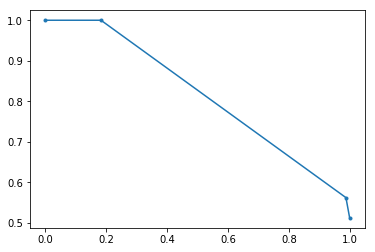

In [216]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

probs = classifier.predict_proba(X_train)[:,1]

precision, recall, thresholds = precision_recall_curve(y_train, probs) # threshold is the classifier prob threshold to decide as either 0 or 1, usually it is 0.5 . 
# calculate F1 score
f1 = f1_score(y_train, y_train_pred)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_train, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot

##### PR curves are calculated for each threshold picked by the classifier and the theshold which results in high P and R is picked as the classifier prob threshold.



---



#### 5. Specificity : similar to recall ..  It is the number of negative predictions divided by the number of negative class values in the data.

In [0]:
#  Specificity  = (TN / (TN + FP))

#### 5.  False Postive Rate : proportion of actual negative, which got predicted as positive ie fraction of FP out of all negative class values in data.

In [0]:
# False Positive Rate(FPR) = 1 - Specificity = (FP / (TN + FP))

#### ROC (Receiver Operating Characteristics) = plot of FPR vs TPR(recall)


*   FPR (FP / (TN + FP)) and TPR (TP / (TP + FN)) have a tradeoff similar to precision recall. 
* Since TPR is fraction of positive class pred out of all pos classes in data and its counterpart is FPR they both can never be high at the same time. 
* Example:  ![alt text](https://i.ibb.co/09ckcPd/gauss-pls.png)
*   Models with higher AUC--> better class separation and predicatabilty.



AUC: 0.664


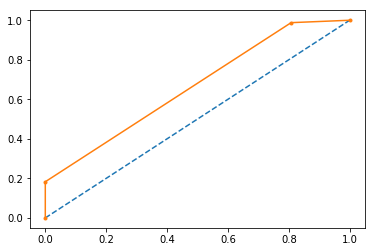

In [153]:
# area under curve of ROC is a good alternative to accuracy
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

probs = classifier.predict_proba(X_train)[:,1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

### Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv = 5, scoring='accuracy') # can change scoring metric
print scores

[0.59615385 0.50980392 0.46       0.57142857 0.5625    ]


### Multi class (confusion matrix) : 
* We compute a matrix $C$ where $C_{i,j}$ representes  the number of points whose actual class is $i$ but is predicted as $j$.
* For binary classification, this will result in the same as the image above (TP, TF, FN, FP)

#### We now extend these metrics for multiclass classification problems

In [0]:
# Creation of Data
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers = 5, n_features=2,random_state=seed) #5 classes 100 for each

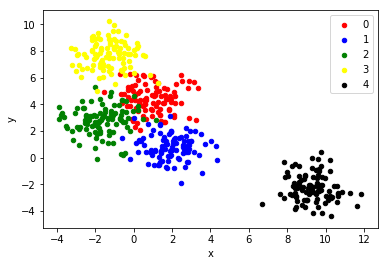

In [26]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow',4:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [0]:
# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=seed) #randomly sampled

#### Using KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5) # has to be odd 
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[51,  0,  0,  1,  0],
       [ 1, 43,  1,  0,  0],
       [ 3,  0, 50,  0,  0],
       [ 2,  0,  0, 52,  0],
       [ 0,  0,  0,  0, 46]])

In [31]:
confusion_matrix(y_test, y_test_pred)

array([[42,  1,  4,  1,  0],
       [ 4, 51,  0,  0,  0],
       [ 6,  0, 41,  0,  0],
       [ 2,  0,  1, 43,  0],
       [ 0,  0,  0,  0, 54]])